In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings 

warnings. filterwarnings('ignore')

In [19]:
X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=0.60, random_state=42)

In [20]:
df = pd.DataFrame(X, columns=['Feature_1','Feature_2'])

In [21]:
df

,Feature_1,Feature_2
0,-6.190063,-7.302015
1,3.021747,1.940593
2,5.953761,1.488191
3,-2.744463,8.136177
4,5.360607,1.728324
...,...,...
495,-6.040014,-6.325329
496,-2.555459,9.218977
497,4.438408,2.974583
498,-7.193261,-6.250704


In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [23]:
inertia = []
K_range = range(1,11)

In [24]:
for K in K_range:
    Kmeans = KMeans(n_clusters=K, random_state = 42)
    Kmeans.fit(X_scaled)
    inertia.append(Kmeans.inertia_)

In [25]:
inertia

[1000.0000000000002,
 297.8954141051722,
 11.575484723104982,
 9.752067977356841,
 8.25717527244628,
 6.9175773204168,
 6.334755391595289,
 5.704177177901431,
 5.060234133532077,
 4.762361898130397]

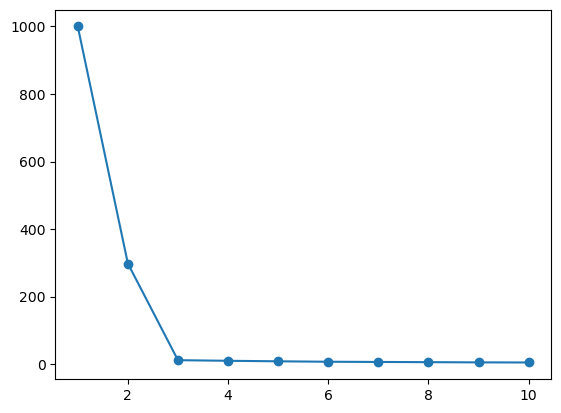

In [26]:
plt.plot(K_range, inertia,marker='o')

In [27]:
kmeans_final = KMeans(n_clusters=3,random_state=42)

In [28]:
cluster_labels = kmeans_final.fit_predict(X_scaled)

In [29]:
df['cluster'] = cluster_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

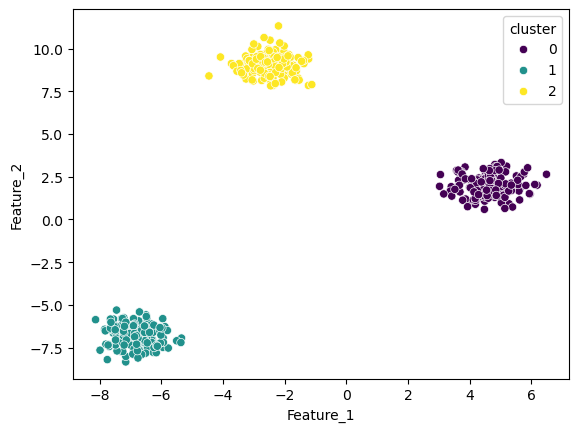

In [32]:
sns.scatterplot(x=df['Feature_1'],
               y=df['Feature_2'],
               hue=df['cluster'],
               palette ='viridis')

In [33]:
from sklearn.datasets import make_moons

In [34]:
X, y_true = make_moons(n_samples=500, noise=0.05, random_state=42)

In [35]:
from sklearn.cluster import KMeans, DBSCAN

In [36]:
df = pd.DataFrame(X, columns=['Feature_1','Feature_2'])

In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [38]:
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)


In [39]:
df['kmeans_cluster'] = kmeans_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

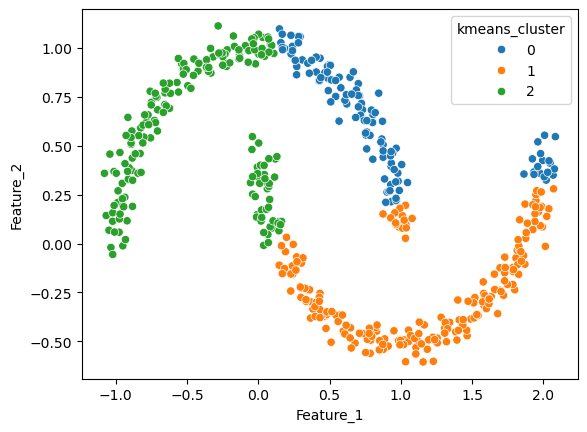

In [40]:
sns.scatterplot(x=df['Feature_1'], y=df['Feature_2'], hue=df['kmeans_cluster'],
               palette='tab10')

In [41]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [42]:
df['dbscan_cluster'] = dbscan_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

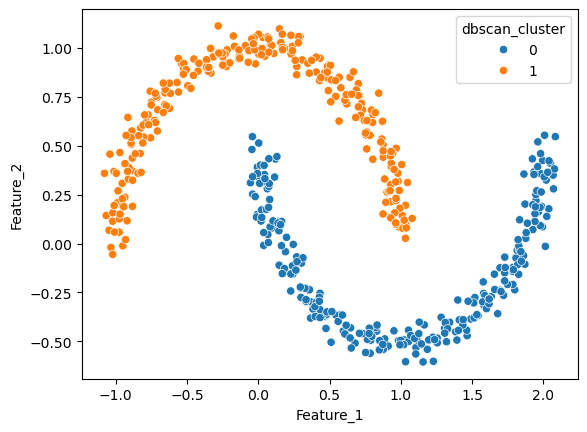

In [43]:
sns.scatterplot(x=df['Feature_1'], y=df['Feature_2'], hue=df['dbscan_cluster'],
               palette = 'tab10')